 Homework 1 (Python Intro pt. 2)
 MUS105 Fall 2019
 Functions, Exceptions Object Oriented

 DUE: Wednesday, September 18

 Instructions:
   * for each of the functions below, read the docstring and implement the function as described.
   * feel free to to add helper functions, but DO NOT MODIFY the descriptions of the original functions.

   * absolutely NO import statements should be added, they will result in an automatic 0 (the autograder
   will break)

   * Some functions specify that certain built in functions may not be used. BE WARY OF THIS.

   * if for whatever reason, an implementation detail is unclear, feel free to email:
     shijiel2@illinois.edu
   for clarification.

   * Have Fun!

In [28]:
def is_palindrome(s):
    """
    given a string s, output whether or not s is a palindrome. A palindrome is defined as a string that is identical
    read forwards or backwards. for example:
        'racecar' is a palindrome.
        'race car' is NOT a palindrome
        'rac e car' is a palindrome
    *for out purposes, spaces matter

    :param s: string to test for a palindrome
    :type s: str
    :return: whether or not s is a palindrome
    :rtype: bool
    """
    
    s_length = len(s)
    
    for i in range(0, int(s_length / 2)):
        if s[i] != s[s_length - i - 1]:
            return False
    
    return True

In [23]:
def is_in(a, b):
    """
    given a sequence of characters (string) b, output whether or not string a can be constructed with the letters of
    string b. For example:
        is_in('cab', 'aabbcc') should output true
        is_in('hello world', 'helo world') should output false

    :param a: string to try and construct
    :type a: str
    :param b: string to clip characters from
    :type b: str
    :return: whether or not a can be constructed from b
    :rtype: bool
    """
    
    b_map = dict()
    
    for c in b:
        if c in b_map:
            b_map[c] += 1
        else:
            b_map[c] = 1
            
    for c in a:
        if c in b_map:
            b_map[c] -= 1
            
            if b_map[c] < 0:
                return False
        else:
            return False
        
    return True

In [32]:
def is_set(l):
    """
    given a list of integers l, output whether or not l is a set. Recall that a set is a collection of UNIQUE items.
    the type of l will be list. When we say 'is l a set?' we mean in the mathematical sense, not the data type sense!
    :param l: list to check uniqueness on
    :type l: list
    :return: whether or not l is a set
    :rtype: bool
    """
    
    l_set = set()
    
    for e in l:
        if(e in l_set):
            return False
        else:
            l_set.add(e)
            
    return True

In [37]:
def str_to_int2(num_string):
    """
    recall str_to_int from hw0. Re-implement that function, but instead of returning -1 in the case of unrecognized
    bases, raise a ValueError, with the message "unrecognized base". If the base is recognized, but the actual 
    representation is wrong, for example:
        0b123
    (binary numbers should only have 0 and 1), then raise a ValueError with the message "incorrect formatting"
    the rest of the functionality should be identical to hw0
    :param num_string: string representing an integer
    :type num_string: str
    :return: an integer with the value denoted by the string
    :rtype: int
    """
    
    length = len(num_string)
    
    if length == 0:
        raise ValueError("unrecognized base")
    elif length == 1:
        return int(num_string)
    else:
        to_return = 0
        base = num_string[0:2]
        
        if(base == '0b'):
            for i in range(2, length):
                c = num_string[i]
                if(c < '0' or c > '1'):
                    raise ValueError("incorrect formatting")
                else:
                    to_return += int(c) * (2 ** (length - i - 1))
        elif(base == '0o'):
            for i in range(2, length):
                c = num_string[i]
                
                if(c < '0' or c > '7'):
                    raise ValueError("incorrect formatting")
                else:
                    to_return += int(c) * (8 ** (length - i - 1))
        elif(base == '0x'):
            for i in range(2, length):
                c = num_string[i]
                exp = 16 ** (length - i - 1)
                
                if(c >= '0' and c <= '9'):
                    to_return += int(c) * exp
                elif(c == 'a'):
                    to_return += 10 * exp
                elif(c == 'b'):
                    to_return += 11 * exp
                elif(c == 'c'):
                    to_return += 12 * exp
                elif(c == 'd'):
                    to_return += 13 * exp
                elif(c == 'e'):
                    to_return += 14 * exp
                elif(c == 'f'):
                    to_return += 15 * exp
                else:
                    raise ValueError("incorrect formatting")
        else:
            for i in range(0, length):
                c = num_string[i]
                
                if(c < '0' or c > '9'):
                    raise ValueError("unrecognized base")
                else:
                    to_return += int(c) * (10 ** (length - i - 1))
        
        return to_return

In [2]:
def nth_element(n, my_list):
    """
    given a list my_list, return the nth element in the list. If the list does not have an nth element,
    i.e. it is too small, you should raise a TypeError with the message:
        "Cannot find nth element of inputs ({}, {})".format(n, my_list)
    the nth element of the list is defined to be list[n - 1], if list is sorted (i.e. the nth smallest item)
    *The naive implementation of this function is just fine, but if you're feeling adventurous, there is an O(n)
    implementation of this. Look into the 'quick select' algorithm!
    :param n: the 'nth' element in a list. For example the 3rd element would be sorted_list[2]
    :type n: int
    :param my_list: input list
    :type my_list: list
    :return: nth element in my_list
    :rtype: float
    """
    
    my_list.sort()
    
    if n < 1 or n > len(my_list):
        raise TypeError("Cannot find nth element of inputs ({}, {})".format(n, my_list))
    else:
        return my_list[n - 1]

In [25]:
class Course:
    """
    the Course class describes a college course. Each course should contain:
        - a course code as a string (i.e. MUS105)
        - a CRN as an integer (i.e. 43357)
        - a course description as a string (i.e. Computation and Music 1)
        - a roster of students as a list
    check the parameter list for exact names of each of these variables

    the Course class as a whole should have a string that describes what university the course
    is in. this class variable should be called university. It should be initialized to "UIUC"

    the Course class should have one static method declared: print_school(), which is defined in more detail below.

    the Course class should have a few instance methods:
        *add_student, which adds a student to a course by netID
        *remove_student, which does the opposite
        *get_description, which prints out some information about the course.

    below, the class skeleton has been written for you. It is up to you to fill out the static members, and all
    of the functions.
    """

    university = "UIUC"

    @staticmethod
    def print_school():
        """
        This function takes no parameters and returns nothing. The only thing it should do is print:
            "The University is: {Course.university}"
        """
        print(f"The University is: {Course.university}")
        
    def __init__(self, code, crn, description):
        """
        Initializer, your code should set instance variables with the same name as the parameters to their respective
        parameter. The first one is done for you.

        **It should also initialize one more instance variable, roster, to an empty list**

        :param code: course code
        :type code: str
        :param crn: course CRN
        :type crn: int
        :param description: course description
        :type description: str
        """

        self.code = code
        self.crn = crn
        self.description = description
        self.roster = list()

    def add_student(self, student):
        """
        adds a student to the roster, by appending their netID to the end of the list

        :param student: netID of student to add
        :type student: str
        """
        
        self.roster.append(student)

    def remove_student(self, student):
        """
        removes a student from the roster, by finding their index, and removing them from the roster list.
        if the function is called on a student who is not enrolled in a course (i.e. they cannot be found in the roster)
        raise a ValueError with the message: "student is not enrolled in course"

        :param student: netID of student to remove
        :type student: str
        """
        try:
            self.roster.remove(student)
        except:
            raise ValueError("student is not enrolled in course")

    def get_description(self):
        """
        return a description of the course in the following format:

        <code>(<crn>):
        <description>
        <len(roster> students: <roster>

        for example:
        MUS105(84765):
        Introduction to Computation and Music
        3 students: shijiel2, taube, haiziyu7

        :return: a description of the course, as described above
        :rtype: str
        """
        
        to_return = f'{self.code}({self.crn}):\n{self.description}\n{len(self.roster)} students: '
        
        for student in self.roster:
            to_return += f'{student}, '
        
        if len(self.roster) > 0:
            to_return = to_return[:-2]
        else:
            to_return = to_return[:-1]
        
        return to_return

In [36]:
print(mus_107.get_description())

MUS 107(12345):
Musicianship I
0 students:


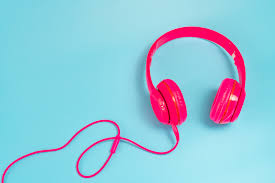